# Final Assignment: Database Management Tools in Python

Constructor University, Data Science for Business and Society

Course: MDET-105-Data Base Management Tools in Python

Semester: Fall 2025

Instructor: Atit Bashyal

Student: Betül Yurtman

Matriculation No.: 30008426

Link to Kaggle dataset: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

## 1. Part I: Data Structures & Algorithms (15 points)

### A. Node-Based Implementations


1. Linked Nodes:\
• Implement a Doubly Linked Node class.\
• Create a Stack class using these nodes.\
• Use two stacks to implement a Queue with enqueue, dequeue, and peek methods.

In [1]:
class DoublyLinkedNode(object): 
    def __init__(self, data=None, next=None, prev=None): 
        self.data = data 
        self.next = next 
        self.prev = prev
        
class Stack:
    def __init__(self):
        self.top = None
        self._size = 0

    def push(self, value):
        new_node = DoublyLinkedNode(value)
        new_node.next = self.top
        if self.top:
            self.top.prev = new_node
        self.top = new_node
        self._size += 1

    def pop(self):
        if self.top is None:
            raise IndexError("Pop from empty stack")
        value = self.top.data
        self.top = self.top.next
        if self.top:
            self.top.prev = None
        self._size -= 1
        return value

    def peek(self):
        if self.top is None:
            return None
        return self.top.data

    def is_empty(self):
        return self._size == 0

    def __len__(self):
        return self._size

class QueueUsingTwoStacks:
    def __init__(self):
        self.in_stack = Stack()
        self.out_stack = Stack()

    def _move_in_to_out(self):
        while not self.in_stack.is_empty():
            self.out_stack.push(self.in_stack.pop())

    def enqueue(self, value):
        self.in_stack.push(value)

    def dequeue(self):
        if self.out_stack.is_empty():
            self._move_in_to_out()
        if self.out_stack.is_empty():
            raise IndexError("Dequeue from empty queue")
        return self.out_stack.pop()

    def peek(self):
        if self.out_stack.is_empty():
            self._move_in_to_out()
        return self.out_stack.peek()

    def is_empty(self):
        return self.in_stack.is_empty() and self.out_stack.is_empty()

In [2]:
# --- Demonstration: Stack using Doubly Linked Nodes ---

stack = Stack()

# Insert elements into the stack
stack.push(10)
stack.push(20)
stack.push(30)

# Peek at the top element
print("Top element (peek):", stack.peek())

# Remove elements from the stack
print("Popped:", stack.pop())
print("Popped:", stack.pop())

# Final state check
print("Top element after pops:", stack.peek())

Top element (peek): 30
Popped: 30
Popped: 20
Top element after pops: 10


2. Hash Table with Binary Search Trees (BST):\
• Implement a Hash Table where each bucket uses a BST to handle collisions.\
• Demonstrate insert, search, and delete operations.

In [3]:
class BSTNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None

    def insert(self, key, value):
        def _insert(node, key, value):
            if node is None:
                return BSTNode(key, value)
            if key < node.key:
                node.left = _insert(node.left, key, value)
            elif key > node.key:
                node.right = _insert(node.right, key, value)
            else:
                node.value = value
            return node
        self.root = _insert(self.root, key, value)

    def search(self, key):
        node = self.root
        while node:
            if key < node.key:
                node = node.left
            elif key > node.key:
                node = node.right
            else:
                return node.value
        return None

    def delete(self, key):
        def _delete(node, key):
            if node is None:
                return None
            if key < node.key:
                node.left = _delete(node.left, key)
            elif key > node.key:
                node.right = _delete(node.right, key)
            else:
                # 0 or 1 child
                if node.left is None:
                    return node.right
                if node.right is None:
                    return node.left
                # 2 children: find inorder successor
                succ = node.right
                while succ.left:
                    succ = succ.left
                node.key, node.value = succ.key, succ.value
                node.right = _delete(node.right, succ.key)
            return node
        self.root = _delete(self.root, key)


class HashTableBST:
    def __init__(self, capacity=16):
        self.capacity = capacity
        self.buckets = [BST() for _ in range(capacity)]

    def _hash(self, key):
        return hash(key) % self.capacity

    def insert(self, key, value):
        idx = self._hash(key)
        self.buckets[idx].insert(key, value)

    def search(self, key):
        idx = self._hash(key)
        return self.buckets[idx].search(key)

    def delete(self, key):
        idx = self._hash(key)
        self.buckets[idx].delete(key)

In [4]:
# --- Demonstration: Hash Table with BST Buckets ---

hash_table = HashTableBST(capacity=5)

# Insert key-value pairs (some keys will collide)
hash_table.insert(10, "Ten")
hash_table.insert(15, "Fifteen")
hash_table.insert(20, "Twenty")
hash_table.insert(25, "Twenty Five")

# Search for existing and non-existing keys
print("Search 15:", hash_table.search(15))
print("Search 99:", hash_table.search(99))

# Delete a key and verify deletion
hash_table.delete(15)
print("Search 15 after deletion:", hash_table.search(15))

Search 15: Fifteen
Search 99: None
Search 15 after deletion: None


3. Graph Implementation:\
• Implement a Graph using a Node class (adjacency list representation). • Include traversal algorithms:\
– Depth-First Search (DFS) – Breadth-First Search (BFS)

In [5]:
from collections import deque

class GraphNode:
    def __init__(self, value):
        self.value = value
        self.neighbors = []  # list of GraphNode

    def __repr__(self):
        return f"GraphNode({self.value})"


class Graph:
    def __init__(self):
        self.nodes = {}  # value -> GraphNode

    def add_node(self, value):
        if value not in self.nodes:
            self.nodes[value] = GraphNode(value)
        return self.nodes[value]

    def add_edge(self, src, dst):
        src_node = self.add_node(src)
        dst_node = self.add_node(dst)
        src_node.neighbors.append(dst_node)

    def dfs(self, start_value):
        start_node = self.nodes.get(start_value)
        if not start_node:
            return []

        visited = set()
        order = []

        def _dfs(node):
            if node in visited:
                return
            visited.add(node)
            order.append(node.value)
            for nb in node.neighbors:
                _dfs(nb)

        _dfs(start_node)
        return order

    def bfs(self, start_value):
        start_node = self.nodes.get(start_value)
        if not start_node:
            return []
        visited = set([start_node])
        q = deque([start_node])
        order = []

        while q:
            node = q.popleft()
            order.append(node.value)
            for nb in node.neighbors:
                if nb not in visited:
                    visited.add(nb)
                    q.append(nb)
        return order

In [6]:
# --- Demonstration: Graph with DFS and BFS ---

graph = Graph()

# Add edges to the graph
graph.add_edge("A", "B")
graph.add_edge("A", "C")
graph.add_edge("B", "D")
graph.add_edge("C", "E")
graph.add_edge("D", "F")

# Perform Depth-First Search
print("DFS starting from A:")
graph.dfs("A")

# Perform Breadth-First Search
print("\nBFS starting from A:")
graph.bfs("A")

DFS starting from A:

BFS starting from A:


['A', 'B', 'C', 'D', 'E', 'F']

## 2. Part II: Databases, Ingestion & Analytics (25 points)

### 2.1. Data & Database Engineering

In this section, I approach the problem from the perspective of a data engineer, focusing on how to select, understand, and prepare data so that it can be efficiently stored and later used for analytics and machine Learning.

#### 2.1.1 Choosing a Dataset

For this assignment, I selected the Book Recommendation Dataset from Kaggle. This dataset contains information about books, users, and user ratings, making it suitable for an end-to-end workflow involving database design, ingestion, analytics, visualization, and machine learning.

**Real-World Source:** The dataset simulates a realistic online book platform, similar to systems used by Amazon Kindle, Goodreads, or digital libraries. In such systems, users read books and provide ratings, while the platform stores metadata about books such as author, publisher, and year of publication. Because the data is derived from human interactions and real-world book catalogs, it reflects realistic patterns of user behavior and content consumption.

**Structure:** The dataset is structured and provided in CSV format. It consists of three main files:\
Books.csv – Contains book metadata such as ISBN, title, author, publication year, and publisher.\
Users.csv – Contains anonymized user information, such as location and age.\
Ratings.csv – Contains user-book interaction data, representing ratings given by users to specific books.\
The clearly defined tabular nature of this data makes it highly suitable for relational database storage.

**Volume & Velocity:** The dataset contains a large number of books, users, and ratings, making it sufficient for demonstrating:
Database ingestion\
Complex queries across tables\
Scalable data storage concepts\
Meaningful statistical analysis

**Relationships:** The dataset contains strong relational connections:
One user can rate many books.\
One book can receive ratings from many users.\
The ratings table acts as a bridge between users and books.\
This allows for designing a well-structured relational data model that demonstrates concepts like:\
Many-to-many relationships\
Primary keys and foreign keys

**Analytical Value:** The dataset is rich in analytical potential and supports:\
Book popularity analysis\
User preference analysis\
Author and publisher ranking\
Exploratory Data Analysis (EDA)\
Development of a recommendation system (ML)

#### 2.1.2 Understanding the Data: Real-World Origins and Characteristics

The dataset represents a real-world online book recommendation and rating platform, similar to systems used by Amazon Kindle, Goodreads, or digital library services. In such a system, users interact with books by reading them and providing ratings based on their personal experience. The platform stores these interactions along with structured metadata about the books and users.

In this type of system:

Users register on a book platform.

They browse, read, and rate books.

Each rating creates a record linking a user to a specific book.

The platform maintains structured information about books، such as title, author, year of publication, and publisher.

This reflects a realistic scenario where digital platforms collect large-scale user interaction data for analytics and recommendation purposes.

Since the data originates from user interaction:

It is mainly structured and stored in tables (Users, Books, Ratings).

The data is reliable but may contain missing or inconsistent values because it comes from user input.

The data generation velocity is moderate, as ratings are created when users interact with books. Therefore, a batch ingestion approach is more suitable than real-time streaming.

The dataset contains strong many-to-many relationships between users and books through ratings.\
Because of this structured relational nature, the dataset is best suited for a relational database system, where relationships and queries can be efficiently handled for analytics and recommendation tasks.


#### 2.1.3 Database Selection

The Book Recommendation Dataset is highly structured and consists of well-defined tables (Books, Users, Ratings). For this reason, a relational database (SQL) is the most suitable storage model for this project.

The real-world system behind the data is an online book platform where users rate books. This naturally creates structured records and clear relationships, which aligns perfectly with relational database principles.

**Schema Design:**

The database schema will consist of three main tables:

Books (ISBN, Title, Author, Year, Publisher)

Users (UserID, Location, Age)

Ratings (UserID, ISBN, Rating)

**Relationships:**

A many-to-many relationship exists between Users and Books, handled through the Ratings table.

Each user can rate multiple books, and each book can be rated by multiple users.

**Normalization Decisions:**

The data will be normalized into separate tables to:

Avoid data duplication

Ensure data consistency

Improve query efficiency

**Each table has a clear primary key:**

ISBN for Books

UserID for Users

Composite key (UserID, ISBN) for Ratings

**Explanation:**

Since the dataset is not hierarchical or time-series, and instead focuses on structured relationships, SQL is the most logical choice. It allows efficient storage, joining, and querying of data, which is essential for future analytics and recommendation tasks.

#### 2.1.4 Designing the Ingestion Pipeline: Connecting the Real World to Your Database

For this project, I design a batch-based ETL pipeline to move the raw Kaggle CSV files (Books.csv, Users.csv, Ratings.csv) into a relational SQL database. The data comes from an online book recommendation platform, where new users, books, and ratings are added over time, but not at extremely high velocity. Therefore, periodic batch ingestion (e.g. daily or weekly) is sufficient instead of real-time streaming.

**Extract:**

In the Extract phase, the raw data is obtained from the Kaggle dataset:

Source files: Books.csv, Users.csv, Ratings.csv

Format: structured CSV files

In a real system, this step would correspond to exporting data from the platform’s operational system.

**Transform:**

In the Transform phase, several cleaning and preparation steps are applied before loading into the SQL database:

Handling missing or invalid values (e.g. unknown age, empty publisher fields).

Ensuring consistent types (e.g. converting year of publication to integer).

Removing obvious duplicates.

Verifying that keys such as ISBN and UserID are in a valid format.

These transformations are guided by the relational schema defined earlier (Books, Users, Ratings). The goal is to produce clean, normalized tables that match the database structure.

**Load:**

In the Load phase, the transformed data is inserted into the relational database using SQL operations:

First loading Books and Users tables.

Then loading the Ratings table, which references UserID and ISBN as foreign keys.

This order ensures referential integrity: every rating refers to an existing user and an existing book. The loading process can be implemented using bulk inserts for efficiency.

**Overall, the ETL pipeline is shaped by:**

Moderate volume and velocity → batch ingestion.

Structured tabular data → transformation focused on cleaning, type consistency, and normalization.

Relational database choice → loading into well-defined SQL tables with primary and foreign keys.

### 2.2. Analytics & Visualization

#### 2.2.1 Writing Insertion, Retrieval, and Analytical Queries

### 2.2.1 Writing Insertion, Retrieval, and Analytical Queries

In a real organizational setting, this dataset would typically be stored in a relational database
because it naturally decomposes into entities (Users, Books) and an interaction table (Ratings).
A normalized schema enables integrity and efficient analytical retrieval through joins.

A simplified relational design would include:
- `Users(User_ID, Location, Age)` where `User_ID` is the primary key,
- `Books(ISBN, Book_Title, Book_Author, Year_Of_Publication, Publisher)` where `ISBN` is the primary key,
- `Ratings(User_ID, ISBN, Book_Rating)` as a bridge table with foreign keys to both Users and Books.

**Insertion examples** (conceptual SQL):
```sql
INSERT INTO Users (User_ID, Location, Age)
VALUES (1, 'nyc, new york, usa', 25);

INSERT INTO Books (ISBN, Book_Title, Book_Author, Year_Of_Publication, Publisher)
VALUES ('0195153448', 'Classical Mythology', 'Mark P. O. Morford', 2002, 'Oxford University Press');

INSERT INTO Ratings (User_ID, ISBN, Book_Rating)
VALUES (276725, '034545104X', 0);

#### 2.2.2 Data Loading & Cleaning in Python

In this step, the original CSV files (Books.csv, Users.csv, Ratings.csv) loaded into Python using pandas, perform basic cleaning, and prepare the data for analysis.

Link to Kaggle dataset: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    module="pandas"
)
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 1200)         # Increase display width
pd.set_option('display.max_colwidth', None)  # Do not truncate text

In [8]:
# Loading dataset
books_df = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv", low_memory=False)
ratings_df = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv", low_memory=False)
users_df = pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv", low_memory=False)

print("Books:", books_df.shape)
print("Ratings:", ratings_df.shape)
print("Users:", users_df.shape)

Books: (271360, 8)
Ratings: (1149780, 3)
Users: (278858, 3)


In [9]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


#### 2.2.3 Exploratory Data Analysis (EDA)

In [12]:
# This is a function to analyze the data
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe())

# Let's start analyzing with books_df
check_df(books_df)

##################### Shape #####################
(271360, 8)
##################### Types #####################
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
##################### Head #####################
         ISBN                                                                                          Book-Title           Book-Author Year-Of-Publication                   Publisher                                                   Image-URL-S                                                   Image-URL-M                                                   Image-URL-L
0  0195153448                                                                                 Classical Mythology    Mark P. O. Morford                2002     Oxford University Press  http://images.amazon.com/image

In [13]:
# --- Clean Books Data ---
# Convert publication year to numeric; invalid values are coerced to NaN
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Mark publication years outside a realistic range as missing
books_df.loc[(books_df['Year-Of-Publication'] < 1950) | (books_df['Year-Of-Publication'] > 2025), 'Year-Of-Publication'] = np.nan

# Compute the median publication year to use for imputation
median_year = books_df['Year-Of-Publication'].median()

# Fill missing publication years with the median to reduce the impact of outliers
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].fillna(median_year)

# Explicitly cast ISBN to string since it is an identifier, not a numeric value
books_df['ISBN'] = books_df['ISBN'].astype(str)

# Drop URL columns - they are not needed for analysis and take up memory
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [14]:
# Analyze the NaN count
print("----- BOOKS NaN COUNT -----")
print(books_df.isna().sum())
print("\nTotal NaN:", books_df.isna().sum().sum())

----- BOOKS NaN COUNT -----
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

Total NaN: 4


In [15]:
# Analyze the duplicated ISBN values
books_df['ISBN'].duplicated().sum()

0

In [16]:
# Analyze the duplicated Book Titles
books_df['Book-Title'].duplicated().sum()

29225

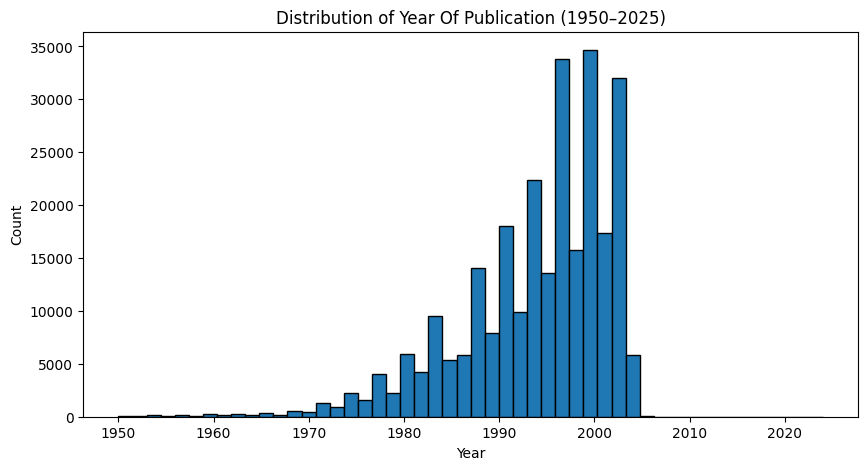

In [17]:
# Distribution of Year of Publication (1950–2025)
plt.figure(figsize=(10,5))
plt.hist(books_df['Year-Of-Publication'], bins=50, edgecolor='black')
plt.title("Distribution of Year Of Publication (1950–2025)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

The publication year distribution shows a strong concentration of books published after the 1990s,
with a sharp increase around the early 2000s.
This pattern reflects both the growth of the publishing industry and the bias of the dataset
toward more recent publications.

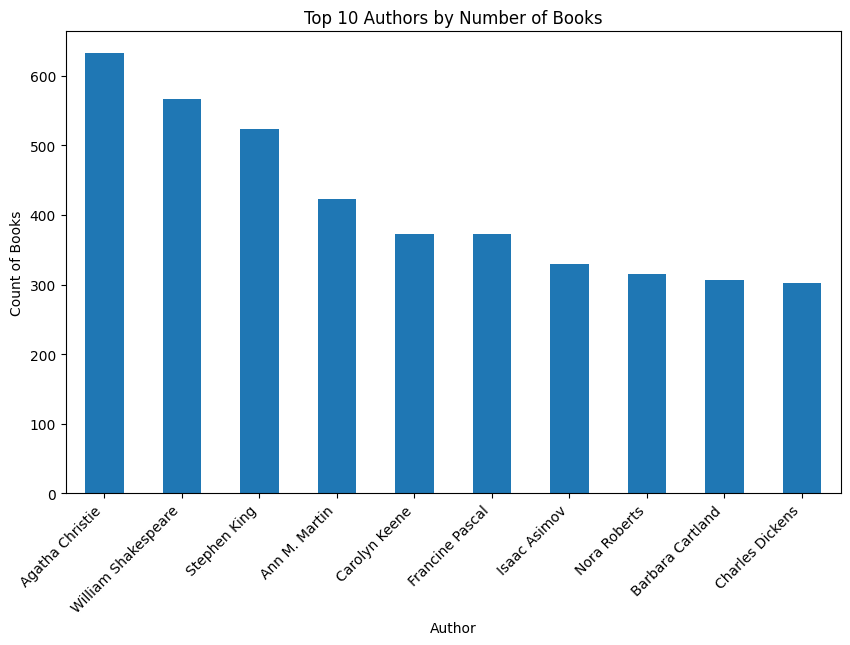

In [18]:
# Top 10 Authors by Number of Books
top_authors = books_df['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_authors.plot(kind='bar')
plt.title("Top 10 Authors by Number of Books")
plt.xlabel("Author")
plt.ylabel("Count of Books")
plt.xticks(rotation=45, ha='right')
plt.show()

This visualization highlights the authors with the most number of books. 

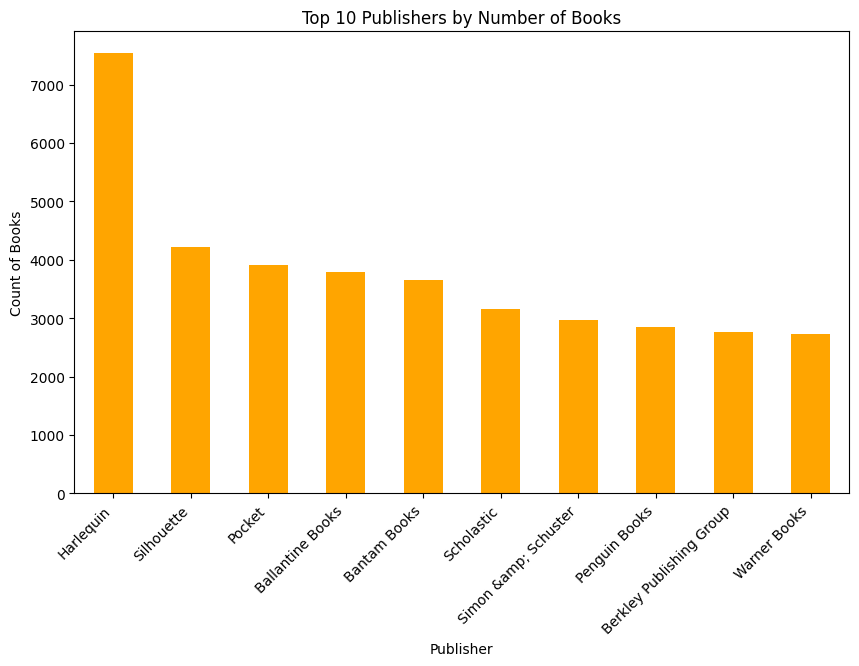

In [19]:
# Top 10 Publishers by Number of Books
top_publishers = books_df['Publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_publishers.plot(kind='bar', color='orange')
plt.title("Top 10 Publishers by Number of Books")
plt.xlabel("Publisher")
plt.ylabel("Count of Books")
plt.xticks(rotation=45, ha='right')
plt.show()

This visualization highlights the publishers with the most number of books. 

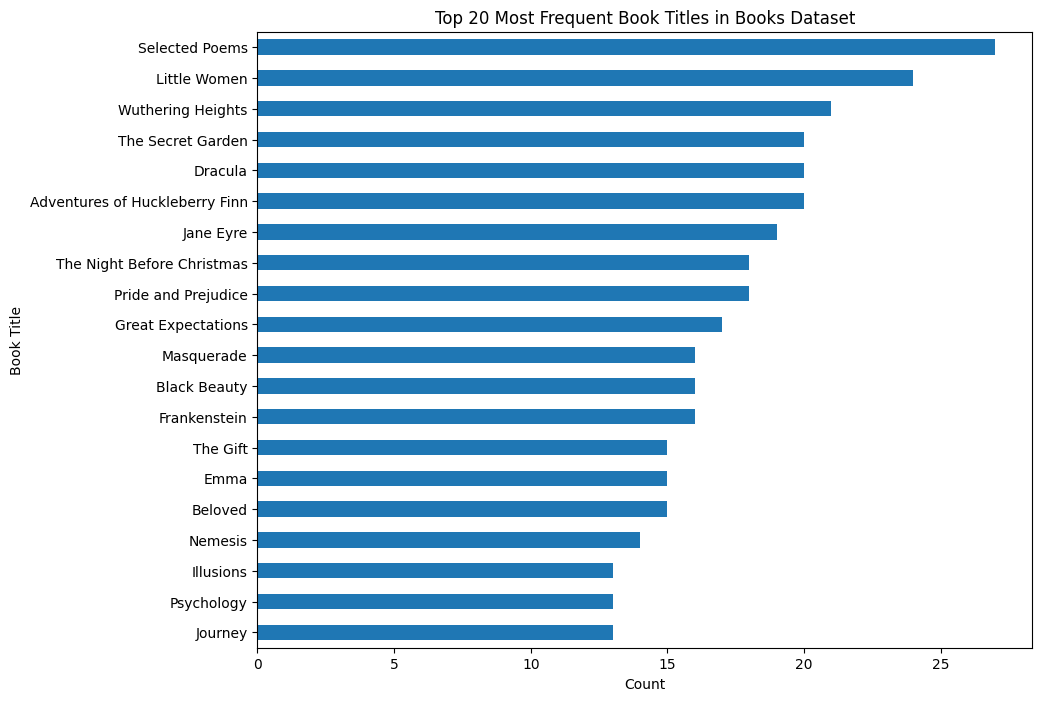

In [20]:
# Top 20 Most Frequent Book Titles in Books Dataset
top_titles = books_df['Book-Title'].value_counts().head(20)

plt.figure(figsize=(10,8))
top_titles.plot(kind='barh')
plt.title("Top 20 Most Frequent Book Titles in Books Dataset")
plt.xlabel("Count")
plt.ylabel("Book Title")
plt.gca().invert_yaxis()
plt.show()

The most frequent book titles appear multiple times in the dataset,
often due to different editions, formats, or publishers.

In [21]:
# Analyze users dataset
check_df(users_df)

##################### Shape #####################
(278858, 3)
##################### Types #####################
User-ID       int64
Location     object
Age         float64
dtype: object
##################### Head #####################
   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
##################### Tail #####################
        User-ID                            Location   Age
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN
##################### NA #####################
Use

In [22]:
# Check missing values
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [23]:
# Check missing values rate
(users_df.isna().mean() * 100).round(2)

User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In [24]:
# Analyze Age statistics
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [25]:
# Mark implausible age values (too young or too old) as missing
users_df.loc[(users_df['Age'] < 5) | (users_df['Age'] > 100), 'Age'] = np.nan

# Compute the median age to use for imputation
median_age = users_df['Age'].median()

# Fill missing age values with the median to preserve the overall age distribution
users_df['Age'] = users_df['Age'].fillna(median_age)

In [26]:
# Analyze the Age statistics again
users_df['Age'].describe()

count    278858.000000
mean         33.643385
std          10.630979
min           5.000000
25%          29.000000
50%          32.000000
75%          35.000000
max         100.000000
Name: Age, dtype: float64

In [27]:
# Merge ratings with user demographic information using User-ID as the key
user_rating_df = ratings_df.merge(users_df, on="User-ID")

# Ensure the Age column is numeric; invalid entries are coerced to NaN
user_rating_df['Age'] = pd.to_numeric(user_rating_df['Age'], errors='coerce')

# Mark implausible age values as missing after the merge
user_rating_df.loc[(user_rating_df['Age'] < 5) | (user_rating_df['Age'] > 100), 'Age'] = np.nan

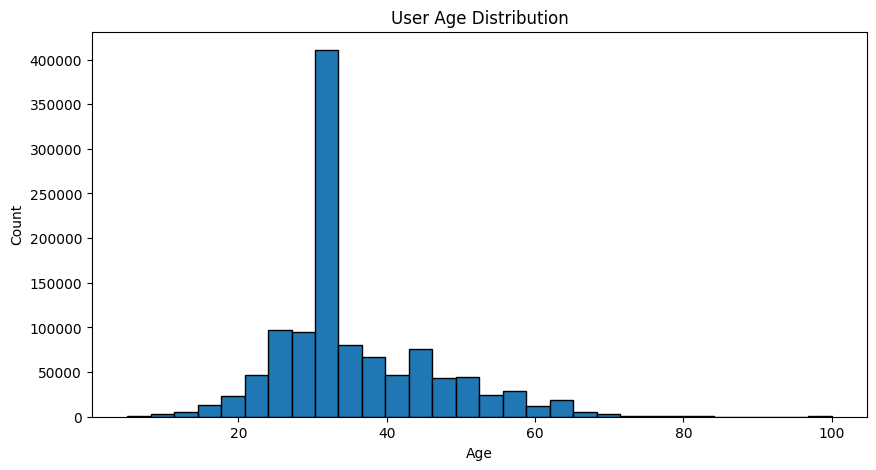

In [28]:
# User Age Distribution
plt.figure(figsize=(10,5))
plt.hist(user_rating_df['Age'], bins=30, edgecolor='black')
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The age distribution shows that most users fall within the adult age range,
with a peak around young and middle adulthood.
Outliers and missing values were observed and handled during preprocessing.

Understanding the demographic distribution of users is critical for interpreting
rating behavior and for designing user-aware recommendation strategies.

In [29]:
# Compute the average book rating for each age group
# This aggregation helps analyze how rating behavior varies across ages
age_rating = user_rating_df.groupby('Age')['Book-Rating'].mean()
age_rating.head()

Age
5.0    4.411483
6.0    4.500000
7.0    3.359447
8.0    3.916376
9.0    1.138809
Name: Book-Rating, dtype: float64

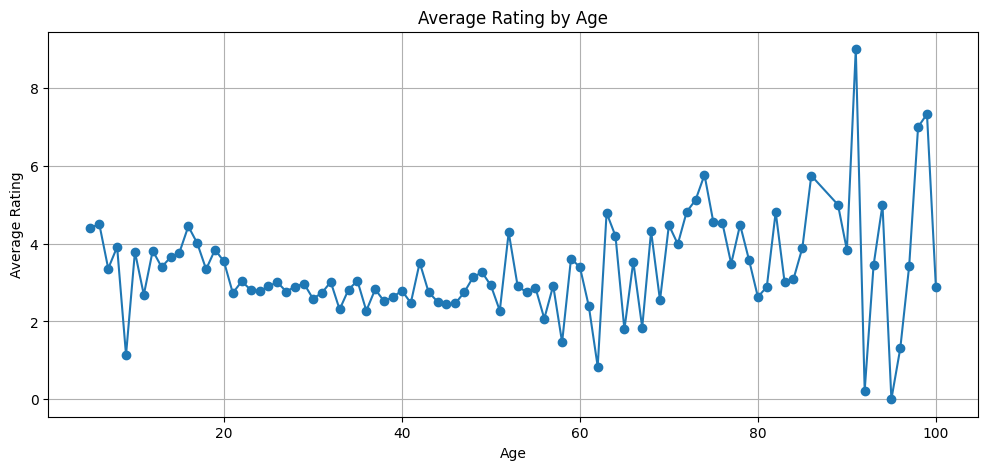

In [30]:
# Average Rating by Age
plt.figure(figsize=(12,5))
plt.plot(age_rating.index, age_rating.values, marker='o')
plt.title("Average Rating by Age")
plt.xlabel("Age")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

The average rating by age analysis suggests that rating behavior varies moderately
across age groups.
Some age ranges tend to give slightly higher or lower ratings on average,
indicating potential differences in rating strictness or preference expression.

In [31]:
# Define age bin boundaries for grouping users into meaningful age ranges
bins = [5, 18, 30, 45, 60, 100]

# Define labels corresponding to each age range
labels = ['5–18', '19–30', '31–45', '46–60', '61–100']

# Create a categorical age group column based on the defined bins
# include_lowest=True ensures the lowest boundary is included
user_rating_df['AgeGroup'] = pd.cut(user_rating_df['Age'], bins=bins, labels=labels, include_lowest=True)

# Compute the average book rating for each age group
# observed=False is explicitly set to retain current pandas behavior and suppress warnings
age_group_rating = user_rating_df.groupby('AgeGroup', observed=False)['Book-Rating'].mean()
age_group_rating

AgeGroup
5–18      3.554752
19–30     2.894637
31–45     2.839420
46–60     2.878600
61–100    2.482046
Name: Book-Rating, dtype: float64

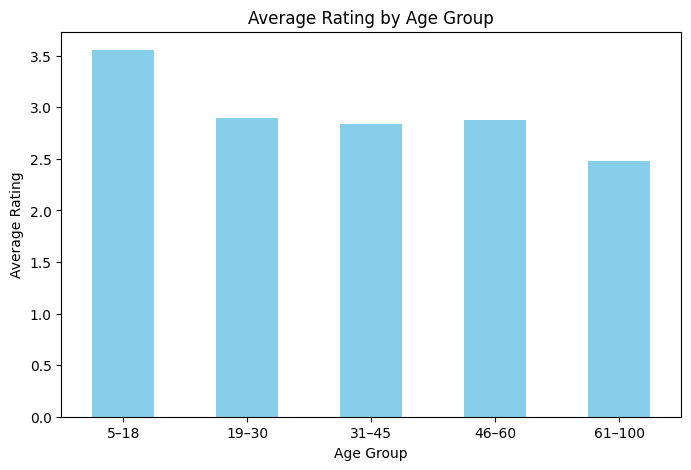

In [32]:
# Average Rating by Age Group
plt.figure(figsize=(8,5))
age_group_rating.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

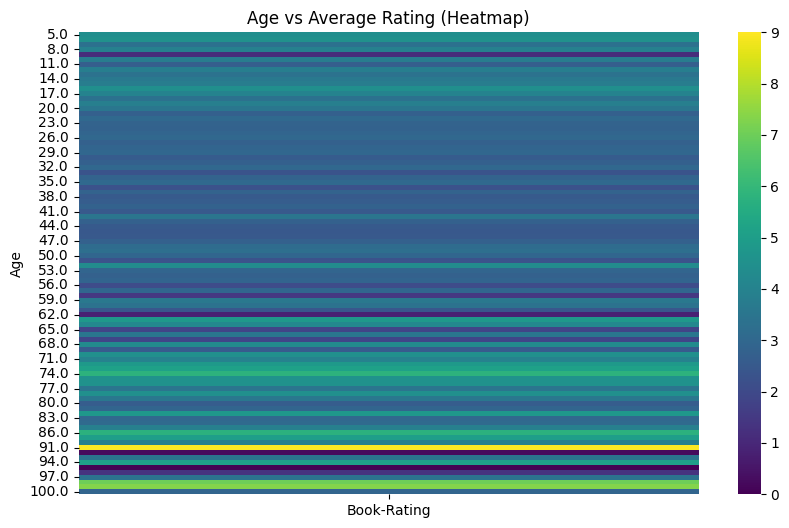

In [33]:
# Age vs Average Rating (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(
    user_rating_df.pivot_table(values="Book-Rating", index="Age", aggfunc="mean"),
    cmap="viridis"
)
plt.title("Age vs Average Rating (Heatmap)")
plt.show()

The heatmap provides a joint view of age groups and average rating values.

In [34]:
# Ensure ISBN is treated as a string
ratings_df['ISBN'] = ratings_df['ISBN'].astype(str)

# Merge ratings with book titles using ISBN as the join key
# An inner join is used to keep only records that exist in both tables
book_rating_df = ratings_df.merge(
    books_df[['ISBN', 'Book-Title']],
    on='ISBN',
    how='inner'
)

# Perform the same merge in a temporary dataframe for validation purposes
# This allows verification that the join operation was successful
tmp = ratings_df.merge(books_df[['ISBN','Book-Title']], on='ISBN', how='inner')

print("Merged rows:", tmp.shape[0])
tmp.head()

Merged rows: 1031136


,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers)


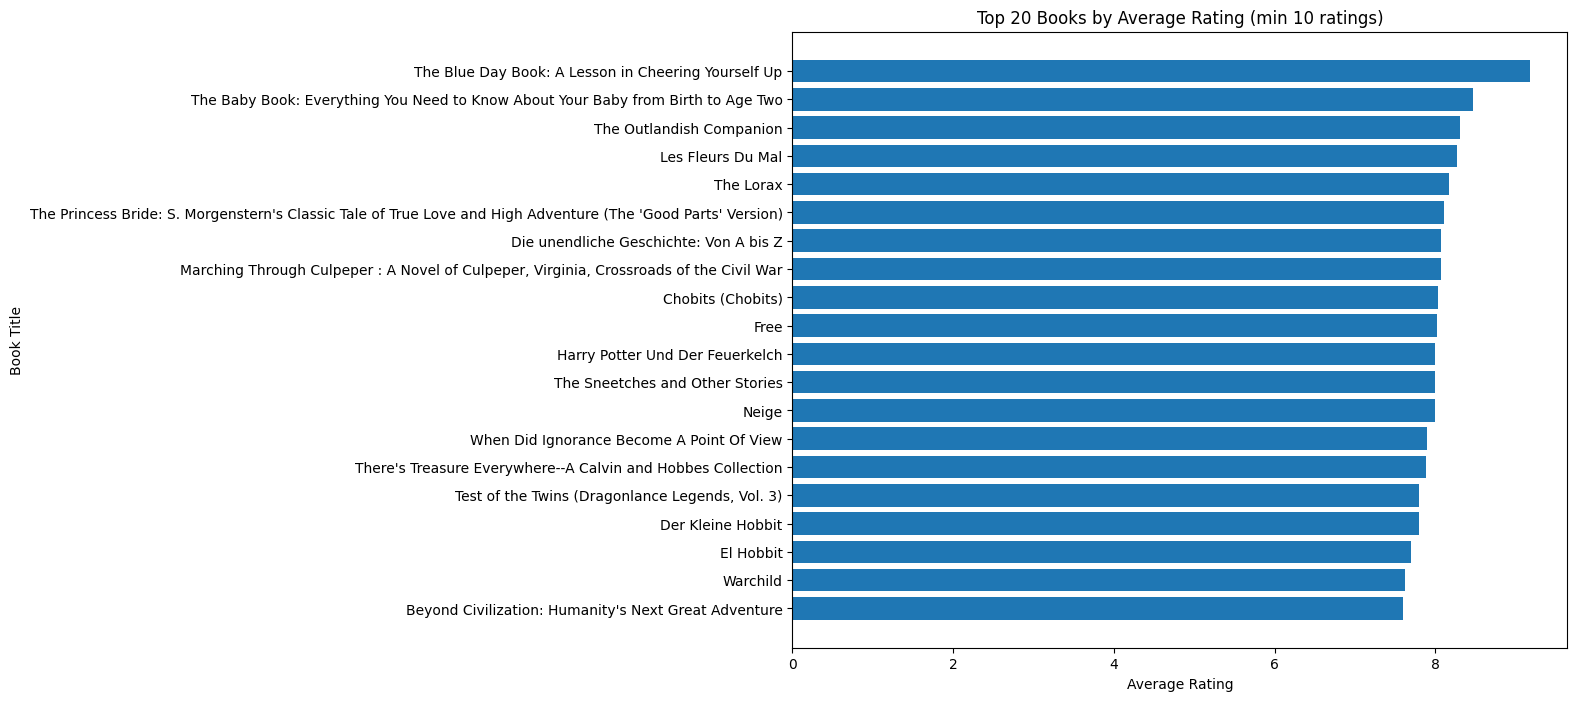

In [35]:
# Compute average rating and rating count for each book title
# This aggregation helps distinguish book quality (mean) from popularity (count)
book_title_stats = (
    book_rating_df
    .groupby('Book-Title')['Book-Rating']
    .agg(['mean', 'count'])
)

# Filter out books with fewer than 10 ratings to reduce bias from sparsely rated items
book_title_stats = book_title_stats[book_title_stats['count'] >= 10]

# Select the top 20 books based on highest average rating
top_books_by_rating = (
    book_title_stats
    .sort_values(by='mean', ascending=False)
    .head(20)
)

# Top 20 Books by Average Rating (min 10 ratings)
plt.figure(figsize=(10,8))
plt.barh(top_books_by_rating.index, top_books_by_rating['mean'])
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.title("Top 20 Books by Average Rating (min 10 ratings)")
plt.gca().invert_yaxis()
plt.show()

This analysis focuses on books with a minimum number of ratings to reduce bias
from sparsely rated items.
The resulting list highlights books that are consistently well-rated by users,
reflecting perceived quality rather than raw popularity.

### EDA Summary and Connection to Machine Learning

The exploratory analysis revealed strong structural patterns in the data,
including skewed distributions, demographic concentration, and user–item interaction behavior.
These findings motivated the use of collaborative filtering techniques,
which leverage shared rating patterns rather than explicit content features.

The insights gained during EDA directly shaped the feature representation
and model choice in the subsequent machine learning component.

### 2.3. Machine Learning Component (Bonus)

Item-Based Collaborative Filtering (Cosine Similarity)

As a simple recommender system, I implemented an item-based collaborative filtering approach.
A user–item rating matrix was constructed and missing values were filled with zeros.
Then, cosine similarity was computed between item vectors (books), producing a book–book similarity matrix.

Recommendations can be generated in two ways:
1) Given a target book, return the most similar books based on cosine similarity.

To keep the computation practical, the matrix was built only on sufficiently active users and sufficiently rated books.

In [36]:
# Ensure ISBN is treated as an identifier (string)
ratings_df['ISBN'] = ratings_df['ISBN'].astype(str).str.strip()
books_df['ISBN'] = books_df['ISBN'].astype(str).str.strip()

# Use only explicit ratings
r = ratings_df[ratings_df['Book-Rating'] > 0].copy()

# Merge book titles for readability
r = r.merge(books_df[['ISBN', 'Book-Title']], on='ISBN', how='inner')

# Reduce matrix size to keep pivot feasible
MIN_USER_RATINGS = 20
MIN_BOOK_RATINGS = 20

active_users = r['User-ID'].value_counts()
popular_books = r['ISBN'].value_counts()

# Filter the dataset to include only active users and sufficiently rated books
# This reduces noise and computational cost when building the user–item matrix
r = r[
    r['User-ID'].isin(active_users[active_users >= MIN_USER_RATINGS].index) &
    r['ISBN'].isin(popular_books[popular_books >= MIN_BOOK_RATINGS].index)
].copy()

print("Filtered interactions:", r.shape)
print("Users:", r['User-ID'].nunique(), "Books:", r['ISBN'].nunique())

Filtered interactions: (45908, 4)
Users: 3129 Books: 2129


In [37]:
# Create user-item rating matrix (rows: users, cols: books)
user_item = r.pivot_table(
    index='User-ID',
    columns='ISBN',
    values='Book-Rating',
    aggfunc='mean'
)

# Fill missing ratings with 0
user_item_filled = user_item.fillna(0)

print("User-item matrix shape:", user_item_filled.shape)

User-item matrix shape: (3129, 2129)


In [38]:
# Compute item-item cosine similarity (books x books)
# Transpose so columns (books) become vectors
item_sim = cosine_similarity(user_item_filled.T)

# Make it a dataFrame for easy indexing
item_sim_df = pd.DataFrame(
    item_sim,
    index=user_item_filled.columns,
    columns=user_item_filled.columns
)

item_sim_df.iloc[:3, :3]

ISBN,000649840X,0007110928,0020199600
ISBN,,,
000649840X,1.000000,0.093043,0.0
0007110928,0.093043,1.000000,0.0
0020199600,0.000000,0.000000,1.0


In [39]:
# --- Helper maps for display ---

# Map ISBN -> title (for readable output)
isbn_to_title = (
    books_df[['ISBN', 'Book-Title']]
    .drop_duplicates('ISBN')
    .set_index('ISBN')['Book-Title']
    .to_dict()
)

# --- Build a title->ISBN mapping that works with the similarity matrix ---

# Only keep titles whose ISBN exists in the similarity matrix (model vocabulary)
available_titles = (
    r[r['ISBN'].isin(item_sim_df.index)][['ISBN', 'Book-Title']]
    .drop_duplicates()
    .copy()
)

# If the same title appears with multiple ISBNs (different editions),
# choose the ISBN with the most ratings in the filtered dataset r.
isbn_popularity = r['ISBN'].value_counts()

title_to_best_isbn = (
    available_titles
    .assign(NumRatings=available_titles['ISBN'].map(isbn_popularity).fillna(0).astype(int))
    .sort_values(['Book-Title', 'NumRatings'], ascending=[True, False])
    .drop_duplicates('Book-Title')
    .set_index('Book-Title')['ISBN']
    .to_dict()
)

# Case-insensitive lookup: lowercase title -> true title
lower_title_to_title = {t.lower(): t for t in title_to_best_isbn.keys()}


def recommend_similar_books_by_isbn(target_isbn, top_n=10):
    """Return top-N most similar books to a given ISBN using cosine similarity."""

    # Normalize input
    target_isbn = str(target_isbn).strip()

    # If the ISBN is not in the similarity matrix, return empty output
    if target_isbn not in item_sim_df.index:
        return pd.DataFrame(columns=['ISBN', 'Book-Title', 'Similarity'])

    # Get similarity scores, exclude the seed ISBN itself, and take top-N
    sims = (
        item_sim_df[target_isbn]
        .drop(labels=[target_isbn])
        .sort_values(ascending=False)
        .head(top_n)
    )

    # Build a readable output table
    out = pd.DataFrame({
        'ISBN': sims.index,
        'Book-Title': [isbn_to_title.get(i, 'Unknown Title') for i in sims.index],
        'Similarity': sims.values
    })

    return out


def recommend_similar_books_by_title(book_title, top_n=10, suggest_n=10):
    """
    Recommend similar books given a title.
    - Works case-insensitively
    - Uses only titles available in the similarity matrix
    - Suggests close matches if an exact title is not found
    """

    # Normalize user input
    query = str(book_title).strip()
    q_lower = query.lower()

    # Exact match (case-insensitive)
    if q_lower in lower_title_to_title:
        true_title = lower_title_to_title[q_lower]
        seed_isbn = title_to_best_isbn[true_title]
        print("Resolved title:", true_title)  # helpful feedback in notebook
        return recommend_similar_books_by_isbn(seed_isbn, top_n=top_n)

    # Otherwise, suggest candidates using "contains" search
    candidates = [t for t in title_to_best_isbn.keys() if q_lower in t.lower()]

    print("Title not found as an exact match.")
    if len(candidates) == 0:
        print("No close matches found. Try another (more popular) title.")
        return pd.DataFrame(columns=['ISBN', 'Book-Title', 'Similarity'])

    print("Did you mean one of these?")
    for t in candidates[:suggest_n]:
        print("-", t)

    return pd.DataFrame(columns=['ISBN', 'Book-Title', 'Similarity'])

In [40]:
# Type any title here and re-run the cell
user_title = "The Da Vinci Code"
recommend_similar_books_by_title(user_title, top_n=10)

Resolved title: The Da Vinci Code


,ISBN,Book-Title,Similarity
0,0671027360,Angels &amp; Demons,0.234589
1,0374199698,Middlesex: A Novel,0.167765
2,0316666343,The Lovely Bones: A Novel,0.161740
3,0553802488,The Face,0.146782
4,0553583441,Touching Evil,0.136580
5,0385511612,Bleachers,0.134671
6,0446531332,Nights in Rodanthe,0.134548
7,0316154059,City of Bones,0.134263
8,0142001740,The Secret Life of Bees,0.132514
9,0525947299,No Second Chance,0.132350


### 2.3.1 Problem Definition

The objective of the machine learning component is to build a simple book recommendation system
based on historical user rating behavior.
Given the absence of explicit labels or prediction targets, the problem is formulated as a
recommendation task rather than a supervised regression or classification problem.

Specifically, the goal is:
- To identify books that are similar to one another based on user rating patterns.
- To recommend books that a user may like, given the books they have previously rated highly.

This problem definition is directly aligned with:
- The relational structure of the dataset (Users–Books–Ratings).
- The user–item interaction patterns revealed during exploratory data analysis.
- The absence of temporal ordering or explicit feedback beyond ratings.

As a result, a collaborative filtering approach based on similarity is a natural fit for this dataset.

### 2.3.2 Feature Engineering

Feature engineering for this recommendation task is guided by the structure of the data.
Rather than constructing traditional feature vectors, the system relies on a user–item rating matrix,
where each book is represented by a vector of user ratings.

The primary engineered feature is:
- A numerical rating vector for each book, capturing how different users rated the same item.

This representation implicitly encodes:
- User preferences,
- Relative book popularity,
- Shared audience behavior between books.

No additional transformation (such as normalization or embedding learning) is applied,
as the cosine similarity measure is scale-invariant and suitable for sparse interaction data.

To ensure computational feasibility and reduce noise, the dataset is filtered to include:
- Users with a minimum number of ratings,
- Books that have received sufficient ratings.

These preprocessing decisions are a direct consequence of earlier data engineering and cleaning steps,
highlighting how storage and ingestion choices influence the features available for modeling.

### 2.3.3 Model Choice & Justification

An item-based collaborative filtering model using cosine similarity was selected for this task.
This choice is motivated by several factors:

- The dataset naturally represents a user–item interaction graph, making similarity-based methods appropriate.
- Cosine similarity provides a simple and interpretable measure of similarity between rating vectors.
- The approach is memory-based and does not require an explicit training phase, which aligns with the exploratory nature of the project.
- Item-based methods are generally more stable than user-based methods in large, sparse datasets.

Additionally, this model choice is strongly influenced by earlier engineering decisions:
- Treating ISBN as a stable string identifier enabled reliable joins between Books and Ratings.
- The relational schema made it straightforward to construct a user–item matrix.
- Cleaning and filtering steps reduced sparsity and improved the quality of similarity comparisons.

Overall, the selected model balances simplicity, interpretability, and effectiveness,
making it well-suited for a machine learning component in an end-to-end data workflow.

#### 2.3.4 Model Evaluation

The implemented recommender system is a memory-based, item-based collaborative filtering approach.
Since cosine similarity is computed directly from the observed user–item interactions,
there is no explicit training phase or learned model parameters.
As a result, traditional train–test evaluation metrics used in supervised learning
(e.g., accuracy, RMSE, or precision-recall curves) are not directly applicable.

Instead, the system is evaluated qualitatively by inspecting the plausibility of recommendations
and ensuring that similar items share comparable rating patterns.